<a href="https://colab.research.google.com/github/elenawang21/enterpriseai/blob/Silas/Notify%20a%20user%20about%20events%20happening%20in%20your%20pipeline%20using%20Slack.%20AND%20Beginn%20Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ERSTER VERSUCH DASHBOARD

In [1]:
pip install dash plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 40.7 MB/s eta 0:00:00


In [2]:
pip install pandas numpy

In [4]:
# Importieren der benötigten Bibliotheken
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

!pip install dash

# Daten laden
df = pd.read_csv('/content/movies_metadata.csv')

# Erstellen der Dash-Anwendung
app = dash.Dash(__name__)

# Layout des Dashboards
app.layout = html.Div([
    html.H1("Movies Dataset Dashboard"),

    # Dropdown-Menü für die Auswahl des Diagrammtyps
    dcc.Dropdown(
        id='chart-dropdown',
        options=[
            {'label': 'Histogramm der Bewertungen', 'value': 'histogram'},
            {'label': 'Durchschnittliche Bewertung nach Genre', 'value': 'avg_rating_genre'},
        ],
        value='histogram'
    ),

    # Platzhalter für das Diagramm
    dcc.Graph(id='movie-graph'),
])

# Callback-Funktion für die Interaktivität
@app.callback(
    Output('movie-graph', 'figure'),
    [Input('chart-dropdown', 'value')]
)
def update_graph(chart_type):
    if chart_type == 'histogram':
        # Histogramm der Bewertungen
        fig = px.histogram(df, x='rating', title='Verteilung der Bewertungen')
    elif chart_type == 'avg_rating_genre':
        # Durchschnittliche Bewertung nach Genre
        avg_ratings = df.groupby('genre')['rating'].mean().reset_index()
        fig = px.bar(avg_ratings, x='genre', y='rating', title='Durchschnittliche Bewertung nach Genre')
    else:
        fig = px.histogram(df, x='rating', title='Verteilung der Bewertungen')

    return fig

# Starte die Dash-Anwendung
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

In [5]:
#ETWAS VERBESSERT WIE DAS EINS DRÜBER'


# Importieren der benötigten Bibliotheken
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

# Daten laden (mit expliziter Angabe der Datentypen, falls nötig)
df = pd.read_csv('/content/movies_metadata.csv', low_memory=False)  # low_memory=False, um DtypeWarning zu vermeiden

# Erstellen der Dash-Anwendung
app = dash.Dash(__name__)

# Layout des Dashboards
app.layout = html.Div([
    html.H1("Movies Dataset Dashboard", style={'textAlign': 'center'}),

    # Dropdown-Menü für die Auswahl des Diagrammtyps
    dcc.Dropdown(
        id='chart-dropdown',
        options=[
            {'label': 'Histogramm der Bewertungen', 'value': 'histogram'},
            {'label': 'Durchschnittliche Bewertung nach Genre', 'value': 'avg_rating_genre'},
        ],
        value='histogram',
        style={'width': '50%', 'margin': 'auto'}
    ),

    # Platzhalter für das Diagramm
    dcc.Graph(id='movie-graph'),

    # Hinweis für Datenquelle
    html.Div([
        html.P("Datenquelle: Movies Metadata Dataset von Kaggle"),
        html.A("Link zum Dataset", href="https://www.kaggle.com/rounakbanik/the-movies-dataset")
    ], style={'textAlign': 'center', 'margin': '20px'})
])

# Callback-Funktion für die Interaktivität
@app.callback(
    Output('movie-graph', 'figure'),
    [Input('chart-dropdown', 'value')]
)
def update_graph(chart_type):
    if chart_type == 'histogram':
        # Histogramm der Bewertungen (beispielhaft mit vote_average)
        fig = px.histogram(df, x='vote_average', title='Verteilung der Bewertungen')
    elif chart_type == 'avg_rating_genre':
        # Durchschnittliche Bewertung nach Genre (beispielhaft mit genres)
        avg_ratings = df.groupby('genres')['vote_average'].mean().reset_index()
        fig = px.bar(avg_ratings, x='genres', y='vote_average', title='Durchschnittliche Bewertung nach Genre')
        fig.update_xaxes(title='Genre')
        fig.update_yaxes(title='Durchschnittliche Bewertung')
    else:
        fig = px.histogram(df, x='vote_average', title='Verteilung der Bewertungen')

    fig.update_layout(height=500, margin={'l': 40, 'b': 40, 'r': 40, 't': 50})
    return fig

# Starte die Dash-Anwendung
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

DARAN ORIENTIERT: https://www.kaggle.com/code/mohamedyosef101/simple-dashboard-with-streamlit
Googlen und weiter herausfinden wie es andere gemacht haben!

In [6]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.0 MB/s eta 0:00:00


In [7]:
import streamlit as st
import pandas as pd
import plotly.express as px
# Daten laden
pd.read_csv('/content/movies_metadata.csv')
st.set_page_config(
    page_title="Movies Dataset Dashboard",
    page_icon="🎬",
    initial_sidebar_state="expanded")

# Layout Container
header = st.container()
filters = st.container()
visualizations = st.container()

with header:
    st.title("Movies Dataset Dashboard")
    st.markdown("""
    This dashboard provides insights into the Movies Dataset from Kaggle.
    Explore different visualizations and filters to understand the data better.
    """)

with filters:
    st.sidebar.title("Filters")

    # Genre filter
    genres = df['genres'].str.split('|', expand=True).stack().unique()
    selected_genre = st.sidebar.selectbox('Select Genre', ['All'] + list(genres))

    # Jahr filter
    years = df['release_year'].sort_values().unique()
    selected_year = st.sidebar.slider('Select Year', min_value=int(years.min()), max_value=int(years.max()), value=(int(years.min()), int(years.max())))

with visualizations:
    st.subheader("Visualizations")

    # Daten filtern basierend auf den ausgewählten Filtern
    filtered_data = df.copy()
    if selected_genre != 'All':
        filtered_data = filtered_data[filtered_data['genres'].str.contains(selected_genre)]
    filtered_data = filtered_data[(filtered_data['release_year'] >= selected_year[0]) & (filtered_data['release_year'] <= selected_year[1])]

    # Beispiel: Histogramm der Bewertungen
    fig_histogram = px.histogram(filtered_data, x='vote_average', title='Distribution of Ratings')
    st.plotly_chart(fig_histogram)

    # Beispiel: Balkendiagramm der durchschnittlichen Bewertung pro Genre
    avg_ratings_genre = filtered_data.explode('genres').groupby('genres')['vote_average'].mean().reset_index()
    fig_avg_rating_genre = px.bar(avg_ratings_genre, x='genres', y='vote_average', title='Average Rating by Genre')

if __name__ == '__main__':
    app.run()


ParserError: Error tokenizing data. C error: EOF inside string starting at row 32416

In [5]:
#NEUER VERSUCH EMAIL 02.07.23# BEI "#..." muss immer der vollständige Code von dem jeweiligen Schritt eingefügt werden oder?!
#ggf die emails von den anderen 2 noch bei "reciever email" reinpacken

import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

# Funktion zum Senden der Email
def send_email(sender_email, receiver_email, password, subject, body):
    msg = MIMEMultipart()
    msg['From'] = sender_email
    msg['To'] = receiver_email
    msg['Subject'] = subject
    msg.attach(MIMEText(body, 'plain'))

    try:
        server = smtplib.SMTP('mail.gmx.de', 587)
        server.starttls()
        server.login(sender_email, password)
        text = msg.as_string()
        server.sendmail(sender_email, receiver_email, text)
        server.quit()
        print("Email erfolgreich gesendet!")
    except Exception as e:
        print(f"Fehler beim Senden der Email: {e}")

# E-Mail Konfiguration
sender_email = "Enterprise_AI@gmx.de"
receiver_email = "fink.silas@gmx.de"
password = "EnterpriseAI_Gruppe4"

# Beispiel Pipeline-Ereignisse
def create_feature_engineering_pipeline():
    # Feature Engineering Code
    # ...
    subject = "Create Feature Engineering Pipeline"
    body = "The feature engineering pipeline has been created."
    send_email(sender_email, receiver_email, password, subject, body)

def model_training_pipeline():
    # Model Training Code
    # ...
    subject = "Model Training Pipeline"
    body = "The model training pipeline has been executed."
    send_email(sender_email, receiver_email, password, subject, body)

def inference_pipeline():
    # Inference Code
    # ...
    subject = "Inference Pipeline"
    body = "The inference pipeline has been executed."
    send_email(sender_email, receiver_email, password, subject, body)

def train_and_deploy_models():
    # Train and Deploy Models Code
    # ...
    subject = "Train Different Models and Deploy Best One"
    body = "Different models have been trained and the best one has been deployed."
    send_email(sender_email, receiver_email, password, subject, body)

def create_extensive_feature_engineering_step():
    # Extensive Feature Engineering Code
    # ...
    subject = "Create Extensive Feature Engineering Step"
    body = "An extensive feature engineering step has been created."
    send_email(sender_email, receiver_email, password, subject, body)

# Beispiel für die Ausführung der Pipelines
create_feature_engineering_pipeline()
model_training_pipeline()
inference_pipeline()
train_and_deploy_models()
create_extensive_feature_engineering_step()

Email erfolgreich gesendet!
Email erfolgreich gesendet!
Email erfolgreich gesendet!
Email erfolgreich gesendet!
Email erfolgreich gesendet!


DeltaGenerator()

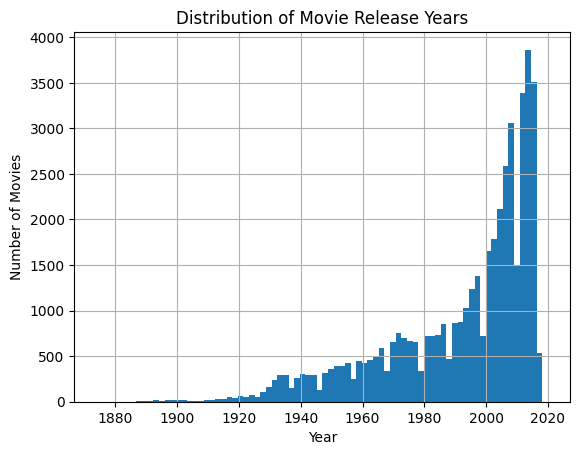

In [20]:

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/movies_metadata.csv', low_memory=False)  # low_memory=False, um DtypeWarning zu vermeiden
movies_metadata = df

# Set the title of the app
st.title("Movies Metadata Dashboard")

# Show raw data
if st.checkbox("Show raw data"):
    st.subheader("Raw Data")
    st.write(movies_metadata.head(50))

# Histogram of movie release years
st.subheader("Histogram of Movie Release Years")
movies_metadata['release_date'] = pd.to_datetime(movies_metadata['release_date'], errors='coerce')
movies_metadata['release_year'] = movies_metadata['release_date'].dt.year

fig, ax = plt.subplots()
movies_metadata['release_year'].dropna().astype(int).hist(bins=80, ax=ax)
ax.set_title("Distribution of Movie Release Years")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Movies")
st.pyplot(fig)

# Show number of movies per year
st.subheader("Number of Movies Released per Year")
movies_per_year = movies_metadata['release_year'].value_counts().sort_index()
st.line_chart(movies_per_year)

# Top 10 highest budget movies
st.subheader("Top 10 Highest Budget Movies")
movies_metadata['budget'] = pd.to_numeric(movies_metadata['budget'], errors='coerce')
top_budget_movies = movies_metadata.sort_values(by='budget', ascending=False).head(10)
st.write(top_budget_movies[['title', 'budget']])

# Average rating of movies by genre
st.subheader("Average Rating by Genre")
movies_metadata['vote_average'] = pd.to_numeric(movies_metadata['vote_average'], errors='coerce')
movies_metadata['genres'] = movies_metadata['genres'].fillna('[]').apply(eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
all_genres = [genre for sublist in movies_metadata['genres'] for genre in sublist]
unique_genres = list(set(all_genres))

genre_ratings = {}
for genre in unique_genres:
    genre_movies = movies_metadata[movies_metadata['genres'].apply(lambda x: genre in x)]
    genre_ratings[genre] = genre_movies['vote_average'].mean()

genre_ratings = pd.Series(genre_ratings).sort_values(ascending=False)
st.bar_chart(genre_ratings)

# Run the app: streamlit run script_name.py

In [22]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/movies_metadata.csv', low_memory=False)
movies_metadata = df.copy()

# Clean data: Convert date and numeric columns
movies_metadata['release_date'] = pd.to_datetime(movies_metadata['release_date'], errors='coerce')
movies_metadata['release_year'] = movies_metadata['release_date'].dt.year
movies_metadata['budget'] = pd.to_numeric(movies_metadata['budget'], errors='coerce')
movies_metadata['revenue'] = pd.to_numeric(movies_metadata['revenue'], errors='coerce')
movies_metadata['runtime'] = pd.to_numeric(movies_metadata['runtime'], errors='coerce')
movies_metadata['vote_average'] = pd.to_numeric(movies_metadata['vote_average'], errors='coerce')

# Sidebar - Title and Description
st.sidebar.title("Explore Movie Data")
st.sidebar.markdown("This dashboard allows you to explore movie metadata.")

# Sidebar - Show raw data
if st.sidebar.checkbox("Show Raw Data"):
    st.subheader("Raw Data")
    st.write(movies_metadata.head(50))

# Main panel - Movie Metadata Dashboard
st.title("Movies Metadata Dashboard")

# Histogram of movie release years
st.subheader("Histogram of Movie Release Years")
fig, ax = plt.subplots()
sns.histplot(movies_metadata['release_year'].dropna().astype(int), bins=50, kde=True, ax=ax)
ax.set_title("Distribution of Movie Release Years")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Movies")
st.pyplot(fig)

# Number of movies released per year
st.subheader("Number of Movies Released per Year")
movies_per_year = movies_metadata['release_year'].value_counts().sort_index()
st.line_chart(movies_per_year)

# Top 10 highest budget movies
st.subheader("Top 10 Highest Budget Movies")
top_budget_movies = movies_metadata.sort_values(by='budget', ascending=False).head(10)
st.write(top_budget_movies[['title', 'budget']])

# Average rating of movies by genre
st.subheader("Average Rating by Genre")
movies_metadata['genres'] = movies_metadata['genres'].fillna('[]').apply(eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
genre_ratings = movies_metadata.explode('genres').groupby('genres')['vote_average'].mean().sort_values(ascending=False)
st.bar_chart(genre_ratings)

# Distribution of movie runtimes
st.subheader("Distribution of Movie Runtimes")
fig, ax = plt.subplots()
sns.histplot(movies_metadata['runtime'].dropna(), bins=30, kde=True, ax=ax)
ax.set_title("Distribution of Movie Runtimes")
ax.set_xlabel("Runtime (minutes)")
ax.set_ylabel("Number of Movies")
st.pyplot(fig)

# Revenue vs Budget
st.subheader("Revenue vs Budget")
fig, ax = plt.subplots()
sns.scatterplot(x='budget', y='revenue', data=movies_metadata, ax=ax)
ax.set_title("Revenue vs Budget")
ax.set_xlabel("Budget")
ax.set_ylabel("Revenue")
st.pyplot(fig)

# Average rating vs runtime
st.subheader("Average Rating vs Runtime")
fig, ax = plt.subplots()
sns.scatterplot(x='runtime', y='vote_average', data=movies_metadata, ax=ax)
ax.set_title("Average Rating vs Runtime")
ax.set_xlabel("Runtime (minutes)")
ax.set_ylabel("Average Rating")
st.pyplot(fig)

# Footer
st.markdown("""
            *Data source: [The Movie Database (TMDb)](https://www.themoviedb.org/)*
            """)

DeltaGenerator()

In [23]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/movies_metadata.csv', low_memory=False)
movies_metadata = df.copy()

# Clean data: Convert date and numeric columns
movies_metadata['release_date'] = pd.to_datetime(movies_metadata['release_date'], errors='coerce')
movies_metadata['release_year'] = movies_metadata['release_date'].dt.year
movies_metadata['budget'] = pd.to_numeric(movies_metadata['budget'], errors='coerce')
movies_metadata['revenue'] = pd.to_numeric(movies_metadata['revenue'], errors='coerce')
movies_metadata['runtime'] = pd.to_numeric(movies_metadata['runtime'], errors='coerce')
movies_metadata['vote_average'] = pd.to_numeric(movies_metadata['vote_average'], errors='coerce')

# Sidebar - Title and Description
st.sidebar.title("Explore Movie Data")
st.sidebar.markdown("This dashboard allows you to explore movie metadata.")

# Sidebar - Show raw data
if st.sidebar.checkbox("Show Raw Data"):
    st.subheader("Raw Data")
    st.write(movies_metadata.head(50))

# Main panel - Movie Metadata Dashboard
st.title("Movies Metadata Dashboard")

# Sidebar - Filter options
st.sidebar.subheader("Filters")

# Filter by release year
years = movies_metadata['release_year'].dropna().unique()
year_selected = st.sidebar.multiselect('Select Release Year(s)', years, default=years)

# Filter by genre
all_genres = [genre for sublist in movies_metadata['genres'] for genre in sublist]
unique_genres = list(set(all_genres))
genre_selected = st.sidebar.multiselect('Select Genre(s)', unique_genres, default=unique_genres)

# Apply filters
filtered_data = movies_metadata[
    (movies_metadata['release_year'].isin(year_selected)) &
    (movies_metadata['genres'].apply(lambda x: any(item in genre_selected for item in x)))
]

# Histogram of movie release years
st.subheader("Histogram of Movie Release Years")
fig, ax = plt.subplots()
sns.histplot(filtered_data['release_year'].dropna().astype(int), bins=50, kde=True, ax=ax)
ax.set_title("Distribution of Movie Release Years")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Movies")
st.pyplot(fig)

# Number of movies released per year
st.subheader("Number of Movies Released per Year")
movies_per_year = filtered_data['release_year'].value_counts().sort_index()
st.line_chart(movies_per_year)

# Top 10 highest budget movies
st.subheader("Top 10 Highest Budget Movies")
top_budget_movies = filtered_data.sort_values(by='budget', ascending=False).head(10)
st.write(top_budget_movies[['title', 'budget']])

# Average rating of movies by genre
st.subheader("Average Rating by Genre")
genre_ratings = filtered_data.explode('genres').groupby('genres')['vote_average'].mean().sort_values(ascending=False)
st.bar_chart(genre_ratings)

# Distribution of movie runtimes
st.subheader("Distribution of Movie Runtimes")
fig, ax = plt.subplots()
sns.histplot(filtered_data['runtime'].dropna(), bins=30, kde=True, ax=ax)
ax.set_title("Distribution of Movie Runtimes")
ax.set_xlabel("Runtime (minutes)")
ax.set_ylabel("Number of Movies")
st.pyplot(fig)

# Revenue vs Budget
st.subheader("Revenue vs Budget")
fig, ax = plt.subplots()
sns.scatterplot(x='budget', y='revenue', data=filtered_data, ax=ax)
ax.set_title("Revenue vs Budget")
ax.set_xlabel("Budget")
ax.set_ylabel("Revenue")
st.pyplot(fig)

# Average rating vs runtime
st.subheader("Average Rating vs Runtime")
fig, ax = plt.subplots()
sns.scatterplot(x='runtime', y='vote_average', data=filtered_data, ax=ax)
ax.set_title("Average Rating vs Runtime")
ax.set_xlabel("Runtime (minutes)")
ax.set_ylabel("Average Rating")
st.pyplot(fig)

# Boxplot of ratings by genre
st.subheader("Boxplot of Ratings by Genre")
fig, ax = plt.subplots()
sns.boxplot(x='vote_average', y='genres', data=filtered_data.explode('genres'), ax=ax)
ax.set_title("Boxplot of Ratings by Genre")
ax.set_xlabel("Average Rating")
ax.set_ylabel("Genre")
st.pyplot(fig)

# Heatmap of correlation between numeric features
st.subheader("Heatmap of Correlation between Numeric Features")
numeric_features = filtered_data[['budget', 'revenue', 'runtime', 'vote_average']].dropna()
corr = numeric_features.corr()
fig, ax = plt.subplots()
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax)
ax.set_title("Correlation between Numeric Features")
st.pyplot(fig)

# Footer
st.markdown("""
            *Data source: [The Movie Database (TMDb)](https://www.themoviedb.org/)*
            """)

DeltaGenerator()